# Project: Investigate a Dataset - TMDB MOVIE

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
The TMDb movie data contains more than 10,000 movies collected from [The Movie Database TMDb](https://www.themoviedb.org/).
The Data set consists of 10866 rows and 21 columns 
> <b>Columns Names</b> 
><ol>
><li>id (not significant)</li>              
><li>imdb_id (not significant)</li>              
><li>popularity (significant)</li>
><li>budget (not significant I will use the other one accounting for inflation over time.)</li>
><li>revenue (not significant I will use the other one accounting for inflation over time.)</li>
><li>original_title (significant)</li>
><li>cast (significant)</li>
><li>homepage (not significant)</li>
><li>director (significant)</li>
><li>tagline (not significant)</li>
><li>keywords (not significant)</li>
><li>overview (not significant)</li>
><li>runtime (significant)</li>
><li>genres (significant)</li>
><li>production_companies (significant)</li>
><li>release_date (not significant I will use release_year)</li>
><li>vote_count(significant)</li>
><li>vote_average (significant)</li>
><li>release_year (significant)</li>
><li>budget_adj (significant)</li>
><li>revenue_adj (significant)</li>
></ol>


### Question(s) for Analysis
><ol>
><li><a href="#Q1">What is the highest 10 movies profit? show Original Title, Runtime, Vote Average, Release Year</a></li>              
><li><a href="#Q2">What is the correlation between Profit and Vote Average?</a></li>  
><li><a href="#Q3">What is the correlation between Profit and Runtime?</a></li>
><li><a href="#Q4">What is the correlation between Profit and Budget?</a></li>  
><li><a href="#Q5">What is the genres get the highest Profit?</a></li>
><li><a href="#Q6">What is the director has the highest movies released?</a></li>    
></ol>


In [100]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
#import matplotlib as plto
%matplotlib inline

In [101]:
# Upgrade pandas to use dataframe.explode() function. 
!pip3 install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


In [102]:
pd.__version__

'1.1.5'

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

### 1- Perform operations to load and inspect data
#### Table of Contents
<ul>
<li><a href="#load">Load the data set</a></li>
<li><a href="#datahead">Print few lines</a></li>
<li><a href="#inspectdata">Inspect the data set</a></li>
</ul>


<a id='load'></a>
#### Load dataset

In [103]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

<a id='datahead'></a>
#### print out a few lines

In [104]:
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='inspectdata'></a>
#### Inspect The Dataset

In [105]:
# No of rows and columns
rows, columns = movie_df.shape
print('The Data set consist of {} rows and {} columns'.format(rows,columns))

The Data set consist of 10866 rows and 21 columns


In [106]:
# Checking Data type and missing values
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [107]:
# Checking Duplication on Data
movie_df.duplicated().sum()

1

In [108]:
#Show Duplication on Data
movie_df[movie_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0



###  2- Data Cleaning

<ul>
<li><a href="#duplicate">Remove Duplication</a></li>
<li><a href="#drop_unused">Drop unused data</a></li>
<li><a href="#drop_null">Deal with null data</a></li>
<li><a href="#replace_zero">Replacing Zero value with Nan</a></li>
<li><a href="#add_profit_column">Add Profit Column</a></li>   
<li><a href="#function">Functions used to Analysis Data</a></li>
</ul>

<a id='duplicate'></a>
#### Remove Duplication

In [109]:
movie_df.drop_duplicates(inplace=True);

In [110]:
movie_df.duplicated().sum()

0

<a id='drop_unused'></a>
#### Drop unused data

In [111]:
movie_df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'budget', 'revenue'],axis=1, inplace=True)

In [112]:
movie_df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<a id='drop_null'></a>
#### Deal with rows with null values 

I have 4 columns (cast, director, production_companies, genres) which has null values 
I will not drop the rows to use other data on the rows for the other columns calculations

<a id='replace_zero'></a>
#### Replace the zero value to nan to avoid using it in calculation

In [113]:
# handle the 0s revenue, budget and runtime columns
movie_df['runtime'].replace(0, np.nan, inplace=True)
movie_df['budget_adj'].replace(0, np.nan, inplace=True)
movie_df['revenue_adj'].replace(0, np.nan, inplace=True)

<a id='add_profit_column'></a>
#### Add Profit Column to the Data Frame

In [114]:
#Calculate and Add Profit Column
movie_df['profit'] = movie_df.revenue_adj - movie_df.budget_adj

In [117]:
#Splitting the genres, director, cast, production_companies 

In [118]:
movie_df['genres'] = movie_df['genres'].str.split('|', expand=True)
movie_df['director'] = movie_df['director'].str.split('|', expand=True)
movie_df['cast'] = movie_df['cast'].str.split('|', expand=True)
movie_df['production_companies'] = movie_df['production_companies'].str.split('|', expand=True)

<a id='function'></a>
#### Functions used to Analysis Data

In [119]:
def genres_year(genre):
    genres_year = movie_df.groupby('release_year')['genres'].apply(dict)
    genres = []
    for year in range(movie_df.release_year.min(),movie_df.release_year.max()+1):
        genres.append(genres_year[year].value_counts().loc[genre])
    return pd.Series(data=genres, index = list(range(movie_df.release_year.min(),movie_df.release_year.max()+1)))

<a id='eda'></a>
## Exploratory Data Analysis

<a id='Q1'></a>
#### 1-What is the highest 10 movies profit? show Original Title,  Runtime, Vote Average, Release Year

In [120]:
#Sorting the Dataframe from the highest profit and get only 10 movies
highest_profit_movies = movie_df.sort_values(by=['profit'], ascending=False).head(10)[['original_title','runtime','vote_average','profit','release_year']].set_index('original_title')
highest_profit_movies

,runtime,vote_average,profit,release_year
original_title,,,,
Star Wars,121.0,7.9,2.750137e+09,1977
Avatar,162.0,7.1,2.586237e+09,2009
Titanic,194.0,7.3,2.234714e+09,1997
The Exorcist,122.0,7.2,2.128036e+09,1973
Jaws,124.0,7.3,1.878643e+09,1975
E.T. the Extra-Terrestrial,115.0,7.2,1.767968e+09,1982
Star Wars: The Force Awakens,136.0,7.5,1.718723e+09,2015
The Net,114.0,5.6,1.551568e+09,1995
One Hundred and One Dalmatians,79.0,6.6,1.545635e+09,1961


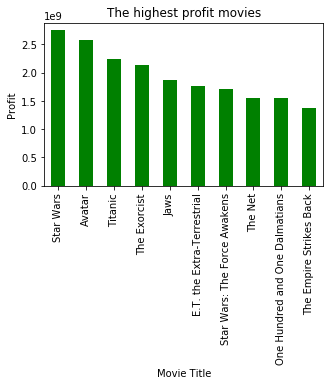

In [121]:
highest_profit_movies['profit'].plot(kind='bar', figsize=(5, 3), color='green', title='The highest profit movies', fontsize= 10)
plt.xlabel('Movie Title')
plt.ylabel('Profit');

#### It is observed that After year 2000 only 2 films are from the highest 10 movies profit.

<a id='Q2'></a>
#### 2-What is the correlation between Profit and Vote Average?

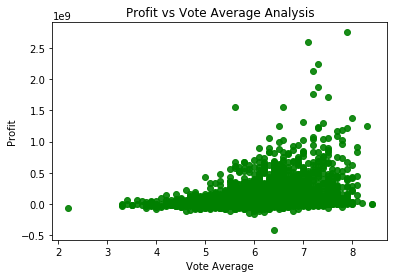

In [122]:
# Display the correlation between Profit and Vote Average
plt.scatter(movie_df['vote_average'], movie_df['profit'], color='green', alpha=0.9)
plt.title('Profit vs Vote Average Analysis')
plt.xlabel('Vote Average')
plt.ylabel('Profit');

#### There is a positive correlation between the profit and Vote Average

<a id='Q3'></a>
#### 3-What is the correlation between Profit and Runtime

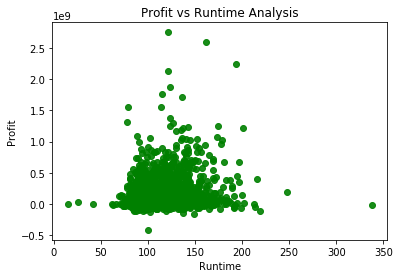

In [123]:
# Display the correlation between Profit and Runtime
plt.scatter(movie_df['runtime'], movie_df['profit'], color='green', alpha=0.9)
plt.title('Profit vs Runtime Analysis')
plt.xlabel('Runtime')
plt.ylabel('Profit');

#### There is no coorelation between Runtime and Profit.

<a id='Q4'></a>
#### 4-What is the correlation between Profit and Budget?

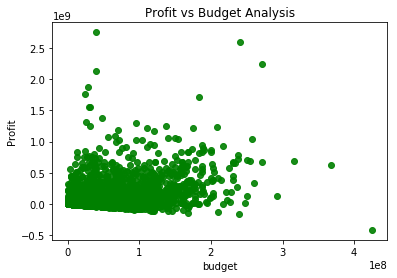

In [124]:
# Display the correlation between Profit and Budget
plt.scatter(movie_df['budget_adj'], movie_df['profit'], color='green', alpha=0.9)
plt.title('Profit vs Budget Analysis')
plt.xlabel('budget')
plt.ylabel('Profit');

#### I Observed that incresing Budget has no significante effet on Profit, Some movie with low Budget has high Profit and some with high Budget has low Profit

<a id='Q5'></a>
#### 5-What is the highest movies released from genres view?

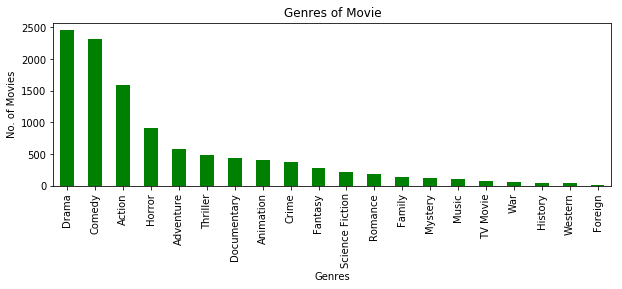

In [125]:
movie_df['genres'].value_counts().plot(kind='bar',figsize=(10, 3), color='green', title='Genres of Movie', fontsize=10)
plt.xlabel('Genres')
plt.ylabel('No. of Movies');

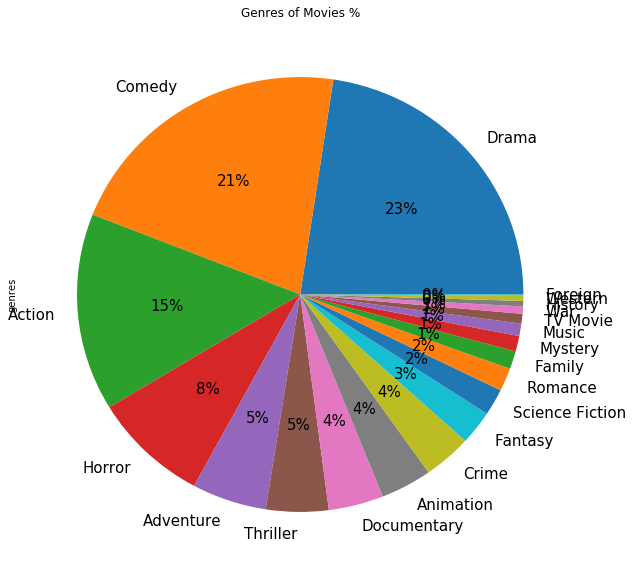

In [126]:
movie_df['genres'].value_counts().plot(kind='pie', figsize=(10, 10), autopct='%1.0f%%', title='Genres of Movies %', fontsize=15);

#### Drama Movies has the hightest Number and The highest percentage

#### Compare The Drama movies with The Second highest one Comedy Movies over years

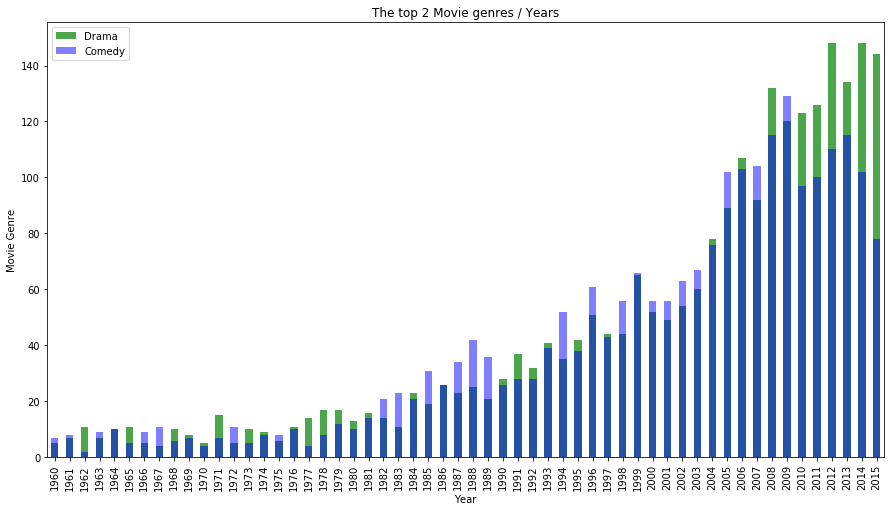

In [127]:
genres_year('Drama').plot(kind='bar', figsize=(15,8), color='green', alpha=0.7, label='Drama')
genres_year('Comedy').plot(kind='bar', color='blue', alpha=0.5, label='Comedy')
plt.xlabel('Year')
plt.ylabel('Movie Genre')
plt.legend()
plt.title('The top 2 Movie genres / Years');

#### The Drama Movies has more share over the last 7 years than the other ones.

#### Movies Profit over years

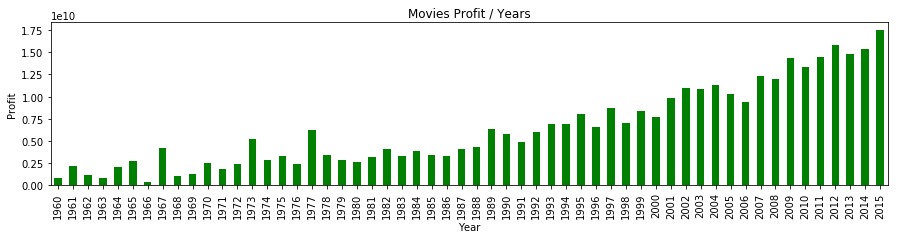

In [128]:
movie_df.groupby(movie_df.release_year)['profit'].sum().plot(kind='bar', figsize=(15, 3), color='green', title='Movies Profit / Years')
plt.xlabel('Year')
plt.ylabel('Profit');

#### Profit is increased over years

<a id='Q6'></a>
#### 6-What is the director has the highest movies released??

In [129]:
director_name = movie_df['director'].value_counts().idxmax()
no_of_movies = movie_df['director'].value_counts().max()
print('The Director \'{}\' has the highest released movies : {} movies'.format(director_name,no_of_movies))

The Director 'Woody Allen' has the highest released movies : 46 movies


In [130]:
movie_df[movie_df['director'] == 'Woody Allen'].sort_values(by=['profit'], ascending=False)[['original_title', 'release_year', 'profit']].head(5).set_index('original_title')

,release_year,profit
original_title,,
Annie Hall,1977,1.232291e+08
Midnight in Paris,2011,1.174127e+08
Everything You Always Wanted to Know About Sex *But Were Afraid to Ask,1972,8.351792e+07
Vicky Cristina Barcelona,2008,8.244959e+07
Sleeper,1973,8.027157e+07


count    3.854000e+03
mean     9.282470e+07
std      1.940715e+08
min     -4.139124e+08
25%     -1.504995e+06
50%      2.737064e+07
75%      1.074548e+08
max      2.750137e+09
Name: profit, dtype: float64

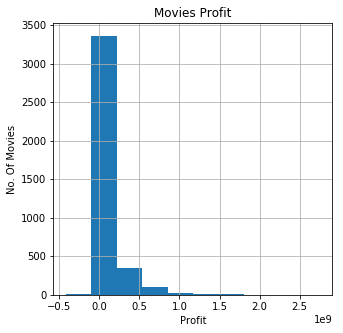

In [131]:
# Show Histogram for Movie Profit
movie_df.profit.hist(figsize=(5, 5));
plt.title("Movies Profit")
plt.xlabel("Profit")
plt.ylabel("No. Of Movies")
movie_df.profit.describe()

#### The profit is right-skewed histogram, most of movies are in the same profit range.

count    10865.000000
mean      2001.321859
std         12.813260
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

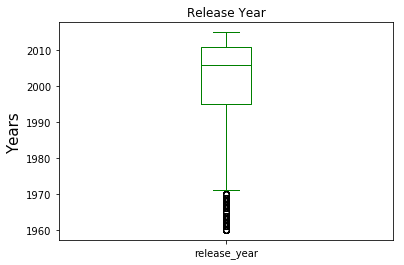

In [89]:
movie_df.boxplot(column =['release_year'], grid = False, color='green');
plt.title('Release Year')
plt.ylabel('Years', fontsize=15)
movie_df.release_year.describe()

#### The profit is left-skewed boxplot, Most of movies after year 1995

<a id='conclusions'></a>
## Conclusions

### Observation Noticed throught analysis of dataset
<ol>
<li>It is observed that After year 2000 only 2 films are from the highest 10 movies profit.</li>
<li>There is a positive correlation between the profit and Vote Average.</li>
<li>There is no correlation betwwen Runtime and Profit.</li>
<li>I Observed that incresing Budget has no significante effet on Profit, Some movie with low Budget has high Profit and    some with high Budget has low Profit.</li>
<li>Drama Movies has the hightest Number.</li>
<li>The Drama Movies has more share over the last 7 years than the other ones.</li>
<li>The Director 'Woody Allen' has the highest released movies.</li>
<li>Profit is increased over years.</li>
<li>Most of analysised movies after year 1995.</li>
<li>most of movies are in the same profit range.</li>
</ol>

### limitations 
<ol>
<li>A lot of Movies has zero budget and revenue which has an effect of the result of analysis(converted to Nan).</li>
<li>I found only on duplication of data which i dropped it.</li>
<li>I found missing data on director, production_companies, genres, cast.</li>    
</ol>

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])